Credit goes to https://colab.research.google.com/github/count0/colab-gt/blob/master/colab-gt.ipynb for the steps to use graph_tool in Colab.

In [ ]:
!echo "deb http://downloads.skewed.de/apt jammy main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard
!pip install gravis

Executing: /tmp/apt-key-gpghome.M9haFyDUA2/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 http://downloads.skewed.de/apt jammy InRelease [7,535 B]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd6

In [ ]:
from graph_tool.all import *
from datetime import datetime

g = load_graph("HepPh_with_louvain_and_label.graphml")

In [ ]:
print(g.vp)

{'_graphml_vertex_id': <VertexPropertyMap object with value type 'string', for Graph 0x7b1e01a06830, at 0x7b1e018badd0>, 'arxiv_id': <VertexPropertyMap object with value type 'int64_t', for Graph 0x7b1e01a06830, at 0x7b1e018ba7d0>, 'date': <VertexPropertyMap object with value type 'string', for Graph 0x7b1e01a06830, at 0x7b1e01898940>, 'label_comms': <VertexPropertyMap object with value type 'int32_t', for Graph 0x7b1e01a06830, at 0x7b1e0189a950>, 'louvain_comms': <VertexPropertyMap object with value type 'int32_t', for Graph 0x7b1e01a06830, at 0x7b1e01898580>}


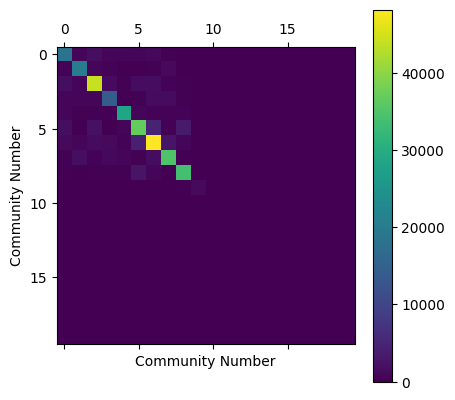

In [ ]:
from matplotlib import pyplot

bstate = BlockState(g, g.vp.louvain_comms)
e = bstate.get_matrix()
B = bstate.get_nonempty_B()
pyplot.matshow(e.todense()[:B, :B])
ax = pyplot.gca()
pyplot.xlabel("Community Number")
pyplot.ylabel("Community Number")
# ax.set_ylim([10,0])
# ax.set_xlim([0,10])
pyplot.colorbar()
pyplot.savefig("louvain_edge_counts.png")

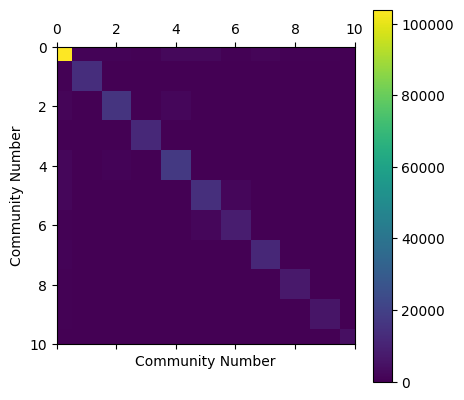

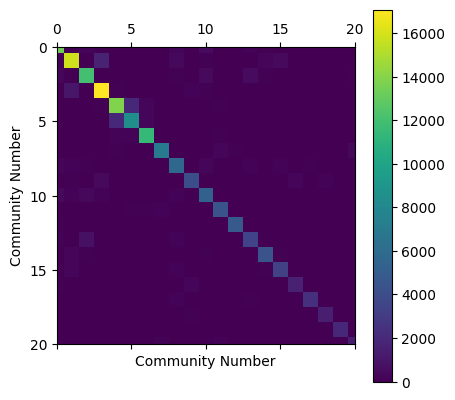

In [ ]:
oreder_labels = order_partition_labels(list(g.vp["label_comms"].a))
oreder_labels_vprop = g.new_vp("int")
oreder_labels_vprop.a = oreder_labels
bstate = BlockState(g, oreder_labels_vprop)
e = bstate.get_matrix()
B = bstate.get_nonempty_B()
pyplot.matshow((e.todense()[:B, :B]))
ax = pyplot.gca()
pyplot.xlabel("Community Number")
pyplot.ylabel("Community Number")
ax.set_ylim([10,0])
ax.set_xlim([0,10])
pyplot.colorbar()
pyplot.savefig("label_edge_counts.png")

pyplot.matshow((e.todense()[:B, :B])[1:, 1:])
ax = pyplot.gca()
pyplot.xlabel("Community Number")
pyplot.ylabel("Community Number")
ax.set_ylim([20,0])
ax.set_xlim([0,20])
pyplot.colorbar()
pyplot.savefig("label_edge_counts_zoom.png")